In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# Reading Datasets:

In [2]:
import numpy as np
import pandas as pd

In [3]:
train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [4]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


# Checking Class distribution:

In [5]:
print(train['Transported'].value_counts())

Transported
True     4378
False    4315
Name: count, dtype: int64


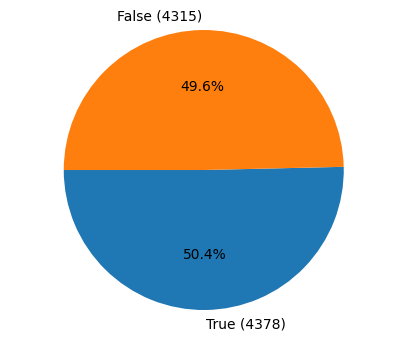

In [6]:
# Import libraries
from matplotlib import pyplot as plt

# Creating plot
fig = plt.figure(figsize=(5, 4))
counts = train['Transported'].value_counts()
labels = [f"True ({counts[True]})", f"False ({counts[False]})"]
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=180)

# Show plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Handle missing values (nan):

In [7]:
# Calculating how many nan in each column
print(train.isnull().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [8]:
# Checking size after removing all nan
print(f'Before removing nan : {train.shape[0]}')
print(f'After removing nan : {train.dropna().shape[0]}')

# We cant remove all nan since will make the training dataset around 6k row only and this is bad giving up on 2k row

Before removing nan : 8693
After removing nan : 6606


In [9]:
# Chack corelation to make better decision on each null column

# remove unecessairy like name and passengerId, (for cabin we will split it later)
tmp_train=train.drop(columns=['PassengerId', 'Cabin', 'Name'])

# Make one hot coding
tmp_train=pd.get_dummies(tmp_train,columns=['HomePlanet','Destination'])

# Show correlation table
tmp_train.corr()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
CryoSleep,1.000000,-0.074273,-0.081402,-0.252396,-0.211510,-0.212514,-0.203991,-0.198857,0.468645,-0.111445,0.096300,0.033155,0.066669,0.089186,-0.104784
Age,-0.074273,1.000000,0.092819,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026,-0.202348,0.219793,0.016273,0.016873,-0.028503,-0.001047
VIP,-0.081402,0.092819,1.000000,0.058785,0.129799,0.018295,0.061059,0.125974,-0.037650,-0.164024,0.148281,0.044158,0.045769,-0.000384,-0.035914
RoomService,-0.252396,0.068723,0.058785,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611,-0.139361,-0.068098,0.248013,-0.024502,-0.063655,0.061780
FoodCourt,-0.211510,0.130421,0.129799,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566,-0.211176,0.369477,-0.126142,0.136412,-0.066214,-0.074411
ShoppingMall,-0.212514,0.033133,0.018295,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141,-0.069880,-0.021282,0.112464,-0.013522,-0.031760,0.033184
Spa,-0.203991,0.123970,0.061059,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131,-0.157018,0.269178,-0.089063,0.076065,-0.053976,-0.034859
VRDeck,-0.198857,0.101007,0.125974,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075,-0.153930,0.284801,-0.113128,0.090825,-0.045816,-0.047128
Transported,0.468645,-0.075026,-0.037650,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000,-0.169019,0.176916,0.019544,0.108722,0.000092,-0.094700
HomePlanet_Earth,-0.111445,-0.202348,-0.164024,-0.139361,-0.211176,-0.069880,-0.157018,-0.153930,-0.169019,1.000000,-0.604411,-0.534195,-0.149534,0.232218,-0.015000


## Initial decision made:
**Column name**     Number of nan, Decision 

**HomePlanet**      201 add unoknown home  
**CryoSleep**       217 remove nan  (cuz have 0.41 correlation so its not good to mess with high corelation feature)  
**Cabin**           199 remove nan  
**Destination**     182 add unknown dest  
**Age**             179 avg  
**VIP**             203 should be false (because False 7904, True 190)  
**RoomService**     181 median=0 (cuz most values are 0)   
**FoodCourt**       183 median=0 (cuz most values are 0)  
**ShoppingMall**    208 median=0 (cuz most values are 0)    
**Spa**             183 median=0 (cuz most values are 0)    
**VRDeck**          188 median=0 (cuz most values are 0)    
**Name**            200 remove column 

In [10]:
train['HomePlanet'].fillna('Unknown', inplace=True)
train=train.dropna(subset=['CryoSleep']) # No rows dropped for test
train=train.dropna(subset=['Cabin']) # No rows dropped for test
train['Destination'].fillna('Unknown', inplace=True)
train['Age'].fillna(train['Age'].mean(), inplace=True)
train['VIP'].fillna(False, inplace=True)
train['RoomService'].fillna(0, inplace=True)
train['FoodCourt'].fillna(0, inplace=True)
train['ShoppingMall'].fillna(0, inplace=True)
train['Spa'].fillna(0, inplace=True)
train['VRDeck'].fillna(0, inplace=True)
train=train.drop(columns=['Name'])

# Same for test set
test['HomePlanet'].fillna('Unknown', inplace=True)


test['Destination'].fillna('Unknown', inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)
test['VIP'].fillna(False, inplace=True)
test['RoomService'].fillna(0, inplace=True)
test['FoodCourt'].fillna(0, inplace=True)
test['ShoppingMall'].fillna(0, inplace=True)
test['Spa'].fillna(0, inplace=True)
test['VRDeck'].fillna(0, inplace=True)
test=test.drop(columns=['Name'])

In [11]:
# Calculating how many nan in each column
print(train.isnull().sum())

# Checking size after handling with nan
print(f'After handling nan : {train.shape[0]}')

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64
After handling nan : 8284


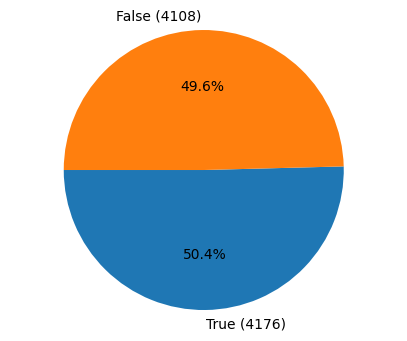

In [12]:
# Checking class distribution after handling nan

# Creating plot
fig = plt.figure(figsize=(5, 4))
counts = train['Transported'].value_counts()
labels = [f"True ({counts[True]})", f"False ({counts[False]})"]
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=180)

# Show plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [13]:
# Chack corelation after the nan handling

# remove unecessairy like name and passengerId, (for cabin we will split it later)
tmp_train=train.drop(columns=['PassengerId', 'Cabin'])

# Make one hot coding
tmp_train=pd.get_dummies(tmp_train,columns=['HomePlanet','Destination'])

# Show correlation table
tmp_train.corr()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Unknown
CryoSleep,1.000000,-0.073049,-0.078675,-0.255956,-0.207876,-0.210218,-0.201112,-0.195844,0.467484,-0.111814,0.096623,0.034326,0.003678,0.065120,0.092115,-0.105226,-0.026960
Age,-0.073049,1.000000,0.092853,0.070046,0.129510,0.032735,0.119642,0.100972,-0.075825,-0.198702,0.219211,0.013670,-0.002344,0.016026,-0.026886,-0.001624,0.014123
VIP,-0.078675,0.092853,1.000000,0.036186,0.125637,0.017253,0.057207,0.117695,-0.035127,-0.162954,0.144452,0.047009,0.003065,0.039571,-0.001141,-0.030155,-0.011292
RoomService,-0.255956,0.070046,0.036186,1.000000,-0.016441,0.053597,0.010286,-0.023127,-0.246065,-0.140558,-0.078715,0.260390,-0.005408,-0.029741,-0.064322,0.066741,-0.003590
FoodCourt,-0.207876,0.129510,0.125637,-0.016441,1.000000,-0.012198,0.217162,0.223465,0.046758,-0.208147,0.365734,-0.124057,-0.020503,0.133918,-0.064488,-0.073383,-0.009491
ShoppingMall,-0.210218,0.032735,0.017253,0.053597,-0.012198,1.000000,0.017675,-0.006914,0.012925,-0.071188,-0.015041,0.107383,-0.008016,-0.010966,-0.030945,0.030342,-0.005403
Spa,-0.201112,0.119642,0.057207,0.010286,0.217162,0.017675,1.000000,0.151816,-0.216969,-0.153221,0.263650,-0.086666,-0.011653,0.072875,-0.055267,-0.031847,0.009104
VRDeck,-0.195844,0.100972,0.117695,-0.023127,0.223465,-0.006914,0.151816,1.000000,-0.204975,-0.154064,0.285303,-0.112748,-0.000890,0.089384,-0.046681,-0.045793,-0.009363
Transported,0.467484,-0.075825,-0.035127,-0.246065,0.046758,0.012925,-0.216969,-0.204975,1.000000,-0.168624,0.175768,0.021372,0.001133,0.108337,0.004507,-0.097225,0.001313
HomePlanet_Earth,-0.111814,-0.198702,-0.162954,-0.140558,-0.208147,-0.071188,-0.153221,-0.154064,-0.168624,1.000000,-0.602594,-0.536641,-0.164266,-0.145349,0.231528,-0.019311,0.006919


# Extracting Features "From Cabin(Deck/Num/Side)":

In [14]:
# Convert Cabin column to (Deck, Num, Side) columns
train[['Deck', 'Num','Side']] = train.Cabin.str.split("/", expand = True)
test[['Deck', 'Num','Side']] = test.Cabin.str.split("/", expand = True)

# Remove old Cabin column
train=train.drop(columns=['Cabin'])
test=test.drop(columns=['Cabin'])

# One hot encoding:

In [15]:
# Side we make it Side_P bolean value True if = P , False if = S
train['Side_P']=train['Side']=='P'
# Drop old Side column
train=train.drop(columns=['Side'])

# for test set
test['Side_P'] = np.where(test['Side'] == 'P', True, np.where(test['Side'] == 'S', False, np.nan))
# Drop old Side column
test=test.drop(columns=['Side'])

In [16]:
# Deck there are 8 categories
train=pd.get_dummies(train,columns=['Deck'])
test=pd.get_dummies(test,columns=['Deck'])

In [17]:
# Num should be transfered to int
train=train.astype({'Num':'int'})
# For test
test['Num'] = pd.to_numeric(test['Num'], errors='coerce').astype('Int64')

In [18]:
# Make one hot coding for HomePlanet, Destination
train=pd.get_dummies(train,columns=['HomePlanet','Destination'])
test=pd.get_dummies(test,columns=['HomePlanet','Destination'])

In [19]:
train=train.astype({'CryoSleep':'bool'})

# For test
test['CryoSleep'] = test['CryoSleep'].astype(pd.BooleanDtype())

In [20]:
# Check all types
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8284 entries, 0 to 8692
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8284 non-null   object 
 1   CryoSleep                  8284 non-null   bool   
 2   Age                        8284 non-null   float64
 3   VIP                        8284 non-null   bool   
 4   RoomService                8284 non-null   float64
 5   FoodCourt                  8284 non-null   float64
 6   ShoppingMall               8284 non-null   float64
 7   Spa                        8284 non-null   float64
 8   VRDeck                     8284 non-null   float64
 9   Transported                8284 non-null   bool   
 10  Num                        8284 non-null   int64  
 11  Side_P                     8284 non-null   bool   
 12  Deck_A                     8284 non-null   bool   
 13  Deck_B                     8284 non-null   bool   
 1

In [21]:
train.corr()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Deck_G,Deck_T,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Unknown
PassengerId,1.000000,-0.005650,-0.006330,0.012287,0.002495,-0.008222,0.019433,-0.003103,0.015413,0.022289,...,-0.000043,-0.018873,-0.001248,0.005245,-0.004931,0.002363,0.001467,0.007905,-0.005456,-0.002305
CryoSleep,-0.005650,1.000000,-0.073049,-0.078675,-0.255956,-0.207876,-0.210218,-0.201112,-0.195844,0.467484,...,0.252820,-0.016358,-0.111814,0.096623,0.034326,0.003678,0.065120,0.092115,-0.105226,-0.026960
Age,-0.006330,-0.073049,1.000000,0.092853,0.070046,0.129510,0.032735,0.119642,0.100972,-0.075825,...,-0.214481,0.012514,-0.198702,0.219211,0.013670,-0.002344,0.016026,-0.026886,-0.001624,0.014123
VIP,0.012287,-0.078675,0.092853,1.000000,0.036186,0.125637,0.017253,0.057207,0.117695,-0.035127,...,-0.100613,-0.003368,-0.162954,0.144452,0.047009,0.003065,0.039571,-0.001141,-0.030155,-0.011292
RoomService,0.002495,-0.255956,0.070046,0.036186,1.000000,-0.016441,0.053597,0.010286,-0.023127,-0.246065,...,-0.152087,-0.003951,-0.140558,-0.078715,0.260390,-0.005408,-0.029741,-0.064322,0.066741,-0.003590
FoodCourt,-0.008222,-0.207876,0.129510,0.125637,-0.016441,1.000000,-0.012198,0.217162,0.223465,0.046758,...,-0.151763,0.015501,-0.208147,0.365734,-0.124057,-0.020503,0.133918,-0.064488,-0.073383,-0.009491
ShoppingMall,0.019433,-0.210218,0.032735,0.017253,0.053597,-0.012198,1.000000,0.017675,-0.006914,0.012925,...,-0.110036,-0.006190,-0.071188,-0.015041,0.107383,-0.008016,-0.010966,-0.030945,0.030342,-0.005403
Spa,-0.003103,-0.201112,0.119642,0.057207,0.010286,0.217162,0.017675,1.000000,0.151816,-0.216969,...,-0.125846,0.043495,-0.153221,0.263650,-0.086666,-0.011653,0.072875,-0.055267,-0.031847,0.009104
VRDeck,0.015413,-0.195844,0.100972,0.117695,-0.023127,0.223465,-0.006914,0.151816,1.000000,-0.204975,...,-0.131034,0.008949,-0.154064,0.285303,-0.112748,-0.000890,0.089384,-0.046681,-0.045793,-0.009363
Transported,0.022289,0.467484,-0.075825,-0.035127,-0.246065,0.046758,0.012925,-0.216969,-0.204975,1.000000,...,0.017763,-0.011170,-0.168624,0.175768,0.021372,0.001133,0.108337,0.004507,-0.097225,0.001313


# Handle missing data for test set (without removing rows):

In [22]:
from sklearn.impute import KNNImputer

# Create a KNNImputer instance
imputer = KNNImputer(n_neighbors=10)

# Perform K-NN imputation on the column
test_imputed = imputer.fit_transform(test)
test_imputed = pd.DataFrame(test_imputed)

# Put imputed columns in test dataframe
test['CryoSleep']=test_imputed[1]
test['Num']=test_imputed[9]
test['Side_P']=test_imputed[10]

# Change all Bool to int becasue not accepted for tensors:

In [23]:
# For train dataset
columns_to_convert_to_int = ['CryoSleep', 'VIP', 'Transported', 'Side_P',
                             'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
                             'Deck_F', 'Deck_G', 'Deck_T','HomePlanet_Earth',
                            'HomePlanet_Europa', 'HomePlanet_Mars', 'HomePlanet_Unknown',
                             'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
                            'Destination_TRAPPIST-1e', 'Destination_Unknown']
train = train.astype({col: 'int' for col in columns_to_convert_to_int})

# For test dataset
columns_to_convert_to_int = ['VIP',
                             'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
                             'Deck_F', 'Deck_G', 'Deck_T','HomePlanet_Earth',
                            'HomePlanet_Europa', 'HomePlanet_Mars', 'HomePlanet_Unknown',
                             'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
                            'Destination_TRAPPIST-1e', 'Destination_Unknown']
test = test.astype({col: 'int' for col in columns_to_convert_to_int})

# Extract (X,y):

In [24]:
X = train.drop(['Transported', 'PassengerId'], axis=1)
y = train['Transported']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=30)

In [26]:
X_test = test.drop(['PassengerId'], axis=1)

# Playing with models:

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Model 1 :RandomForestClassifier :

In [28]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier()
model1.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model1.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8014484007242003


## Model 2 :DNN :

### Create plot function:

In [29]:
def PlotHistory(history,x):
    # Plot training and validation accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    # Plot training and validation loss
    plt.subplot(1, 3, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    
    # Plot for 40 epochs loss
    plt.subplot(1, 3, 3)
    plt.plot(history.history['loss'][x:], label='Training Loss')
    plt.plot(history.history['val_loss'][x:], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Training and Validation Loss After {x} Epochs')
    
    plt.tight_layout()
    plt.show()

In [30]:
import tensorflow as tf
from tensorflow import keras

# Build the DNN model
model2 = keras.Sequential([
    keras.layers.Input(shape=(X.shape[1],)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0001)),
    keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model2
history = model2.fit(X_train, y_train, epochs=400, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model2 on the validation set
loss, accuracy = model2.evaluate(X_val, y_val)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')

Epoch 1/400
208/208 [==============================] - 1s 3ms/step - loss: 12.4334 - accuracy: 0.6878 - val_loss: 3.2127 - val_accuracy: 0.7013
Epoch 2/400
208/208 [==============================] - 1s 3ms/step - loss: 2.1949 - accuracy: 0.7275 - val_loss: 3.0533 - val_accuracy: 0.7369
Epoch 3/400
208/208 [==============================] - 1s 3ms/step - loss: 2.2376 - accuracy: 0.7411 - val_loss: 2.2022 - val_accuracy: 0.7477
Epoch 4/400
208/208 [==============================] - 1s 3ms/step - loss: 2.0979 - accuracy: 0.7386 - val_loss: 2.0576 - val_accuracy: 0.6995
Epoch 5/400
208/208 [==============================] - 1s 3ms/step - loss: 1.3801 - accuracy: 0.7475 - val_loss: 1.6426 - val_accuracy: 0.7634
Epoch 6/400
208/208 [==============================] - 1s 3ms/step - loss: 1.4655 - accuracy: 0.7469 - val_loss: 1.9151 - val_accuracy: 0.7127
Epoch 7/400
208/208 [==============================] - 0s 2ms/step - loss: 1.4121 - accuracy: 0.7436 - val_loss: 1.5483 - val_accuracy: 0.756

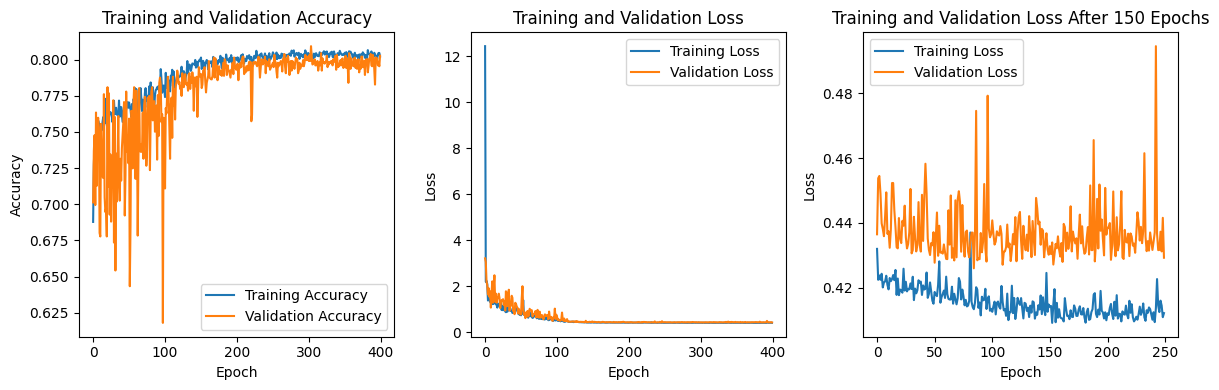

In [31]:
PlotHistory(history,150)

## Model 3 :LogisticRegression :

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Create a Logistic Regression model3
model3 = LogisticRegression(random_state=42)

# Train the model3 on the training data
model3.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = model3.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report and confusion matrix for more detailed evaluation
print("Classification Report:")
print(classification_report(y_val, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

Accuracy: 0.7773083886541944
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.76      0.78       851
           1       0.76      0.79      0.78       806

    accuracy                           0.78      1657
   macro avg       0.78      0.78      0.78      1657
weighted avg       0.78      0.78      0.78      1657

Confusion Matrix:
[[651 200]
 [169 637]]


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Model 4 :xgboost :

In [33]:
import xgboost as xgb

# Create an XGBoost classifier
model4 = xgb.XGBClassifier(random_state=42)

# Train the model4 on the training data
model4.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = model4.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report and confusion matrix for more detailed evaluation
print("Classification Report:")
print(classification_report(y_val, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

Accuracy: 0.8002414001207001
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       851
           1       0.80      0.78      0.79       806

    accuracy                           0.80      1657
   macro avg       0.80      0.80      0.80      1657
weighted avg       0.80      0.80      0.80      1657

Confusion Matrix:
[[696 155]
 [176 630]]


## Model 5 :lightgbm :

In [34]:
import lightgbm as lgb

# Create a LightGBM classifier
model5 = lgb.LGBMClassifier(random_state=42)

# Train the model5 on the training data
model5.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = model5.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report and confusion matrix for more detailed evaluation
print("Classification Report:")
print(classification_report(y_val, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

Accuracy: 0.8092939046469523
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       851
           1       0.80      0.80      0.80       806

    accuracy                           0.81      1657
   macro avg       0.81      0.81      0.81      1657
weighted avg       0.81      0.81      0.81      1657

Confusion Matrix:
[[693 158]
 [158 648]]


## Model 6 :CatBoostClassifier :

In [35]:
from catboost import CatBoostClassifier

# Create a CatBoost classifier
model6 = CatBoostClassifier(random_state=42, verbose=0)

# Train the model6 on the training data
model6.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = model6.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report and confusion matrix for more detailed evaluation
print("Classification Report:")
print(classification_report(y_val, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

Accuracy: 0.8086904043452021
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       851
           1       0.79      0.82      0.81       806

    accuracy                           0.81      1657
   macro avg       0.81      0.81      0.81      1657
weighted avg       0.81      0.81      0.81      1657

Confusion Matrix:
[[677 174]
 [143 663]]


## Model 7 :AdaBoost :

In [36]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier (weak learner)
base_model = DecisionTreeClassifier(max_depth=2)  # You can adjust the 'max_depth' parameter for the weak learner

# Create an AdaBoost classifier
model7 = AdaBoostClassifier(base_model, n_estimators=80, random_state=42)  # You can adjust the 'n_estimators' parameter

# Train the model7 on the training data
model7.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = model7.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report and confusion matrix for more detailed evaluation
print("Classification Report:")
print(classification_report(y_val, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

Accuracy: 0.8020519010259505
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       851
           1       0.79      0.81      0.80       806

    accuracy                           0.80      1657
   macro avg       0.80      0.80      0.80      1657
weighted avg       0.80      0.80      0.80      1657

Confusion Matrix:
[[676 175]
 [153 653]]


## Model 8 :KNN :

In [37]:
from sklearn.neighbors import KNeighborsClassifier

# Create a K-Nearest Neighbors classifier
model8 = KNeighborsClassifier(n_neighbors=170)  # You can adjust the number of neighbors (k) as needed

# Train the model8 on the training data
model8.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = model8.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report and confusion matrix for more detailed evaluation
print("Classification Report:")
print(classification_report(y_val, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

Accuracy: 0.7742908871454436
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.70      0.76       851
           1       0.73      0.86      0.79       806

    accuracy                           0.77      1657
   macro avg       0.78      0.78      0.77      1657
weighted avg       0.78      0.77      0.77      1657

Confusion Matrix:
[[593 258]
 [116 690]]


## Model 9 :DecisionTreeClassifier :

In [38]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
model9 = DecisionTreeClassifier(random_state=42, max_depth=None)  # You can adjust the 'max_depth' parameter to control tree depth

# Train the model9 on the training data
model9.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = model9.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report and confusion matrix for more detailed evaluation
print("Classification Report:")
print(classification_report(y_val, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

Accuracy: 0.7537718768859385
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.75      0.76       851
           1       0.74      0.75      0.75       806

    accuracy                           0.75      1657
   macro avg       0.75      0.75      0.75      1657
weighted avg       0.75      0.75      0.75      1657

Confusion Matrix:
[[642 209]
 [199 607]]


## Ensemble 1:

In [39]:
# Make predictions using your base models
predictions_model1 = model1.predict(X_val)
predictions_model2 = model2.predict(X_val)
predictions_model4 = model4.predict(X_val)
predictions_model5 = model5.predict(X_val)
predictions_model6 = model6.predict(X_val)
predictions_model7 = model7.predict(X_val)

# Reshape the DNN output since its (1657,1) not (1657,)
predictions_model2=predictions_model2.reshape(1657,)

# Assign weights to your base models (you can adjust these weights) 0.81593
# weight_model1 = 0.2
# weight_model2 = 0.1
# weight_model4 = 0.15
# weight_model5 = 0.15
# weight_model6 = 0.2
# weight_model7 = 0.2

weight_model1 = 0.17
weight_model2 = 0.15
weight_model4 = 0.17
weight_model5 = 0.17
weight_model6 = 0.17
weight_model7 = 0.17

# Combine predictions with weighted average
final_predictions = (
    weight_model1 * predictions_model1 +
    weight_model2 * predictions_model2 +
    weight_model4 * predictions_model4 +
    weight_model5 * predictions_model5 +
    weight_model6 * predictions_model6 +
    weight_model7 * predictions_model7
)

# Round the final predictions to binary values (0 or 1)
final_predictions = np.where(final_predictions >= 0.5, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y_val, final_predictions)
print(f"Accuracy: {accuracy}")

# Print classification report and confusion matrix for more detailed evaluation
print("Classification Report:")
print(classification_report(y_val, final_predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_val, final_predictions))

52/52 [==============================] - 0s 1ms/step
Accuracy: 0.8141219070609536
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       851
           1       0.81      0.81      0.81       806

    accuracy                           0.81      1657
   macro avg       0.81      0.81      0.81      1657
weighted avg       0.81      0.81      0.81      1657

Confusion Matrix:
[[697 154]
 [154 652]]


# Make final prediction and export csv file:

### With ensemble:

In [40]:
# Make predictions using your base models
predictions_model1 = model1.predict(X_test)
predictions_model2 = model2.predict(X_test)
predictions_model4 = model4.predict(X_test)
predictions_model5 = model5.predict(X_test)
predictions_model6 = model6.predict(X_test)
predictions_model7 = model7.predict(X_test)

# Reshape the DNN output since its (4277,1) not (4277,)
predictions_model2=predictions_model2.reshape(4277,)

weight_model1 = 0.17
weight_model2 = 0.15
weight_model4 = 0.17
weight_model5 = 0.17
weight_model6 = 0.17
weight_model7 = 0.17

# Combine predictions with weighted average
final_predictions = (
    weight_model1 * predictions_model1 +
    weight_model2 * predictions_model2 +
    weight_model4 * predictions_model4 +
    weight_model5 * predictions_model5 +
    weight_model6 * predictions_model6 +
    weight_model7 * predictions_model7
)

# Round the final predictions to binary values (0 or 1)
y_result = np.where(final_predictions >= 0.5, 1, 0)

134/134 [==============================] - 0s 1ms/step


In [41]:
# y_result = model.predict(X_test)

In [42]:
y_result=y_result.astype(bool)

In [43]:
result = pd.DataFrame({'PassengerId': test['PassengerId'], 'Transported': y_result})

In [44]:
result

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [45]:
result.to_csv('result.csv',index=False)